In [78]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

### toy data for create matrices for testing

In [103]:
(dataset, _), (_, _) = keras.datasets.mnist.load_data()
dataset = dataset / 255.
dataset.shape

In [104]:
x,n = symbols('x,n', real=True)

### unitary discrete cosine transform type 4 matrix creation procedure

In [105]:
def dct(N, evalf=False):
    m = Matrix(N, N, lambda n,k: cos((pi/N)*(n+Rational(1,2))*(k+Rational(1,2))))
    m = sqrt(Rational(2,N)) * m
    if evalf:
        m = m.evalf()
    return m
def dctf(N):
    return dct(N, evalf=True)

### creates 3 toy matrix, $M_1,M_2,M_3$ and plot $M_1 M_2 M_3$

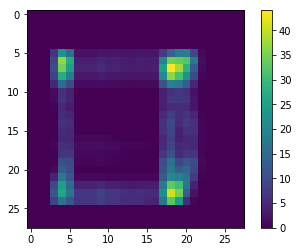

In [111]:
M1 = Matrix(dataset[0])
M2 = Matrix(dataset[1])
M3 = Matrix(dataset[2])
M = M1 @ M2 @ M3
plt.imshow(np.array(M).astype(np.float))
plt.colorbar()
plt.show()

### apply $DCT2D(M)$ to toy matrices into frequency matrices, $M_1^F,M_2^F,M_3^F$

In [112]:
M1F = dctf(28) @ M1 @ dctf(28)
M2F = dctf(28) @ M2 @ dctf(28)
M3F = dctf(28) @ M3 @ dctf(28)

### plot $IDCT2D(M_1^F M_2^F M_3^F)$

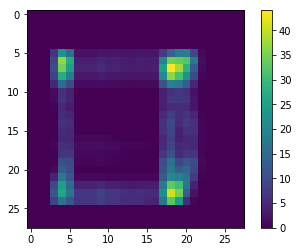

In [113]:
T = np.array(dctf(28) @ (M1F @ M2F @ M3F) @ dctf(28))
plt.imshow(np.array(T).astype(np.float))
plt.colorbar()
plt.show()

### drop most of the insignificant frequences ($f < 0.2$)
- produce frequency matrices with a lot of $0$ as $M_1^{F'},M_2^{F'},M_3^{F'}$
- plot $IDCT2D(M_1^{F'} M_2^{F'} M_3^{F'})$

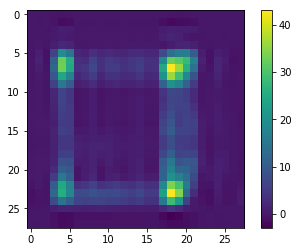

In [123]:
M1F_dropped = M1F.applyfunc(lambda x: x if abs(x) > 0.2 else 0)
M2F_dropped = M2F.applyfunc(lambda x: x if abs(x) > 0.2 else 0)
M3F_dropped = M3F.applyfunc(lambda x: x if abs(x) > 0.2 else 0)
T = np.array(dctf(28) @ (M1F_dropped @ M2F_dropped @ M3F_dropped) @ dctf(28))
plt.imshow(np.array(T).astype(np.float))
plt.colorbar()
plt.show()

### show the removed frequece in $M_1^{F'}$
- $1$ means the fequency is keeped
- $0$ means the fequency is dropped

In [127]:
M1F_dropped.applyfunc(lambda x: 1 if x != 0 else 0)

⎡1  1  1  1  1  0  0  0  0  1  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  1  1  1  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  0  1  1  0  1  0  0  0  0  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  1  1  1  0  0  0  1  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  1  0  1  1  1  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  0  1  1  1  0  1  1  1  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  0  1  0  1  1  1  1  1  1  0  0  0  0  0  0  0  

We could use this technique to set most of the matrix elements to 0 and skip the computation steps of them to accelerate computation time with cost of error